In [1]:
import picamera2 as p2
import time
import matplotlib.pylab as plt
import cv2

In [13]:
picam2 = p2.Picamera2()
sm = picam2.sensor_modes[0]
print(sm)
sensor_mode=dict(output_size=sm['size'],bit_depth=sm['bit_depth'])
video_config = picam2.create_video_configuration(
    main={"size": sm['size']}, 
    lores={"size": (160, 120)}, 
    #display="lores",
    sensor=sensor_mode
    )
picam2.configure(video_config)
picam2.start()
time.sleep(1)
picam2.camera_configuration()

[22:00:17.179383650] [26477]  INFO Camera camera.cpp:1183 configuring streams: (0) 640x480-XBGR8888 (1) 640x480-SGBRG10_CSI2P
[22:00:17.179882343] [26495]  INFO RPI vc4.cpp:608 Sensor: /base/soc/i2c0mux/i2c@1/ov5647@36 - Selected sensor format: 640x480-SGBRG10_1X10 - Selected unicam format: 640x480-pGAA
[22:00:17.224818661] [26477]  INFO Camera camera.cpp:1183 configuring streams: (0) 640x480-XBGR8888 (1) 1296x972-SGBRG10_CSI2P
[22:00:17.228453217] [26495]  INFO RPI vc4.cpp:608 Sensor: /base/soc/i2c0mux/i2c@1/ov5647@36 - Selected sensor format: 1296x972-SGBRG10_1X10 - Selected unicam format: 1296x972-pGAA
[22:00:17.253967685] [26477]  INFO Camera camera.cpp:1183 configuring streams: (0) 640x480-XBGR8888 (1) 1920x1080-SGBRG10_CSI2P
[22:00:17.255206642] [26495]  INFO RPI vc4.cpp:608 Sensor: /base/soc/i2c0mux/i2c@1/ov5647@36 - Selected sensor format: 1920x1080-SGBRG10_1X10 - Selected unicam format: 1920x1080-pGAA
[22:00:17.277146515] [26477]  INFO Camera camera.cpp:1183 configuring stream

{'format': SGBRG10_CSI2P, 'unpacked': 'SGBRG10', 'bit_depth': 10, 'size': (640, 480), 'fps': 58.92, 'crop_limits': (16, 0, 2560, 1920), 'exposure_limits': (134, 1103219, None)}


{'use_case': 'video',
 'transform': <libcamera.Transform 'identity'>,
 'colour_space': <libcamera.ColorSpace 'SMPTE170M'>,
 'buffer_count': 6,
 'queue': True,
 'main': {'format': 'XBGR8888',
  'size': (640, 480),
  'stride': 2560,
  'framesize': 1228800},
 'lores': {'format': 'YUV420',
  'size': (160, 120),
  'stride': 192,
  'framesize': 34560},
 'raw': {'format': 'SGBRG10_CSI2P',
  'size': (640, 480),
  'stride': 800,
  'framesize': 384000},
 'controls': {'NoiseReductionMode': <NoiseReductionModeEnum.Fast: 1>,
  'FrameDurationLimits': (33333, 33333)},
 'sensor': {'bit_depth': 10, 'output_size': (640, 480)},
 'display': 'main',
 'encode': 'main'}

<class 'numpy.ndarray'> (480, 640, 4)


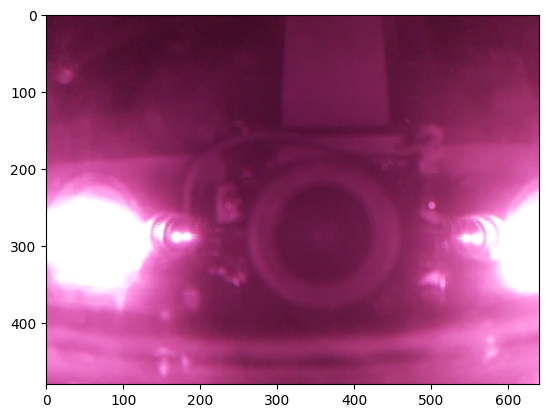

In [14]:
array = picam2.capture_array("main")
print(type(array),array.shape)
plt.imshow(array[::-1,::-1,:])
plt.show()
#picam2.close()

<class 'numpy.ndarray'> (180, 192)
<class 'numpy.ndarray'> (120, 160, 3)


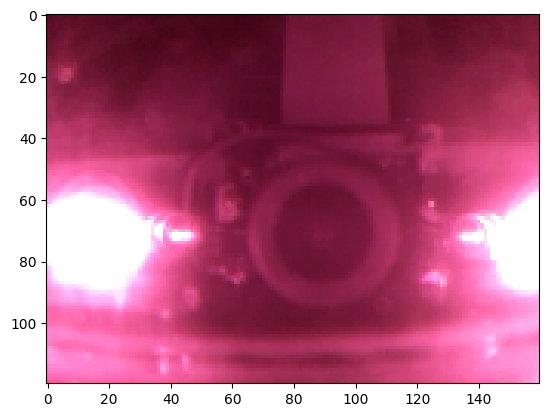

In [15]:
array2 = picam2.capture_array("lores")
print(type(array2),array2.shape)
array2 = cv2.cvtColor(array2,cv2.COLOR_YUV420p2BGR)[:,:-32]
print(type(array2),array2.shape)
plt.imshow(array2[::-1,::-1,:])
#picam2.close()

<class 'numpy.ndarray'> (480, 800)


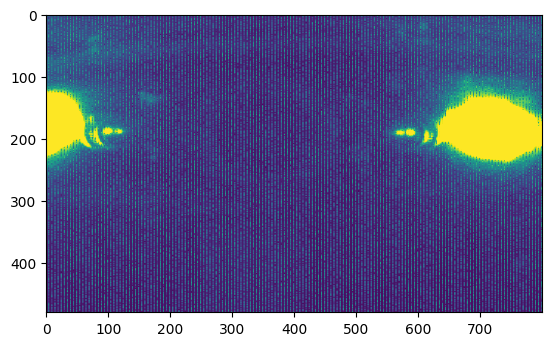

In [16]:
array = picam2.capture_array("raw")
print(type(array),array.shape)
plt.imshow(array)
plt.show()

In [17]:
request = picam2.capture_request()
meta_data = request.get_metadata()
request.release()
meta_data

{'SensorTimestamp': 79289726145000,
 'ColourCorrectionMatrix': (2.1115739345550537,
  -0.5618800520896912,
  -0.5496973991394043,
  -0.49196499586105347,
  2.053236961364746,
  -0.5612685084342957,
  -0.13735553622245789,
  -0.5860171318054199,
  1.723362684249878),
 'FocusFoM': 136,
 'ColourTemperature': 6492,
 'ColourGains': (1.6836881637573242, 1.1847764253616333),
 'AeLocked': False,
 'Lux': 3665.689697265625,
 'FrameDuration': 33302,
 'SensorBlackLevels': (1024, 1024, 1024, 1024),
 'DigitalGain': 1.0038378238677979,
 'AnalogueGain': 1.0,
 'ScalerCrop': (16, 0, 2560, 1920),
 'ExposureTime': 7643}

In [11]:
picam2.capture_metadata()

{'SensorTimestamp': 79188215265000,
 'ColourCorrectionMatrix': (2.1115739345550537,
  -0.5618800520896912,
  -0.5496973991394043,
  -0.49196499586105347,
  2.053236961364746,
  -0.5612685084342957,
  -0.13735553622245789,
  -0.5860171318054199,
  1.723362684249878),
 'FocusFoM': 133,
 'ColourTemperature': 6492,
 'ColourGains': (1.6836881637573242, 1.1847764253616333),
 'AeLocked': False,
 'Lux': 3693.290771484375,
 'FrameDuration': 16971,
 'SensorBlackLevels': (1024, 1024, 1024, 1024),
 'DigitalGain': 1.001824140548706,
 'AnalogueGain': 1.0,
 'ScalerCrop': (16, 0, 2560, 1920),
 'ExposureTime': 7576}

In [12]:
picam2.close()

### Sensor modes

In [2]:
_picam2 = p2.Picamera2()
_sm = _picam2.sensor_modes
_picam2.close()
_sm

[25:39:42.367500728] [40401]  INFO Camera camera_manager.cpp:284 libcamera v0.1.0+118-563cd78e
[25:39:42.458865225] [40417]  WARN RPiSdn sdn.cpp:39 Using legacy SDN tuning - please consider moving SDN inside rpi.denoise
[25:39:42.465362516] [40417]  INFO RPI vc4.cpp:444 Registered camera /base/soc/i2c0mux/i2c@1/ov5647@36 to Unicam device /dev/media0 and ISP device /dev/media1
[25:39:42.465453070] [40417]  INFO RPI pipeline_base.cpp:1142 Using configuration file '/usr/share/libcamera/pipeline/rpi/vc4/rpi_apps.yaml'
[25:39:42.477206386] [40401]  INFO Camera camera_manager.cpp:284 libcamera v0.1.0+118-563cd78e
[25:39:42.522019430] [40420]  WARN RPiSdn sdn.cpp:39 Using legacy SDN tuning - please consider moving SDN inside rpi.denoise
[25:39:42.524638201] [40420]  INFO RPI vc4.cpp:444 Registered camera /base/soc/i2c0mux/i2c@1/ov5647@36 to Unicam device /dev/media0 and ISP device /dev/media1
[25:39:42.524703867] [40420]  INFO RPI pipeline_base.cpp:1142 Using configuration file '/usr/share/li

[{'format': SGBRG10_CSI2P,
  'unpacked': 'SGBRG10',
  'bit_depth': 10,
  'size': (640, 480),
  'fps': 58.92,
  'crop_limits': (16, 0, 2560, 1920),
  'exposure_limits': (134, 2147483647, None)},
 {'format': SGBRG10_CSI2P,
  'unpacked': 'SGBRG10',
  'bit_depth': 10,
  'size': (1296, 972),
  'fps': 43.25,
  'crop_limits': (0, 0, 2592, 1944),
  'exposure_limits': (92, 760565, None)},
 {'format': SGBRG10_CSI2P,
  'unpacked': 'SGBRG10',
  'bit_depth': 10,
  'size': (1920, 1080),
  'fps': 30.62,
  'crop_limits': (348, 434, 1928, 1080),
  'exposure_limits': (118, 760636, None)},
 {'format': SGBRG10_CSI2P,
  'unpacked': 'SGBRG10',
  'bit_depth': 10,
  'size': (2592, 1944),
  'fps': 15.63,
  'crop_limits': (0, 0, 2592, 1944),
  'exposure_limits': (130, 969249, None)}]

In [3]:
sensors=[]
mains = []
arrays = []
configs=[]
def make_sensor_info():
	for ssm in _sm:
		picam2 = p2.Picamera2()
		sensor = dict(output_size=ssm['size'],bit_depth=ssm['bit_depth'])
		main=dict(size=sensor['output_size'])
		video_config = picam2.create_video_configuration(sensor=sensor,main=main)
		#video_config = picam2.create_video_configuration(main={"size": (160, 120)}, lores={"size": (160, 120)}, display="lores")
		picam2.configure(video_config)
		picam2.start()
		time.sleep(1)
		array = picam2.capture_array("main")
		sensors.append(sensor)
		mains.append(main)
		arrays.append(array)
		fname=f"image{ssm['size']}.jpg"
		imwrite(fname,array)
		print()
		configs.append(video_config)
		print(sensor)
		print(array.shape)
		picam2.close()

make_sensor_info()

[25:39:44.505027015] [40401]  INFO Camera camera.cpp:1183 configuring streams: (0) 640x480-XBGR8888 (1) 640x480-SGBRG10_CSI2P
[25:39:44.505469936] [40420]  INFO RPI vc4.cpp:608 Sensor: /base/soc/i2c0mux/i2c@1/ov5647@36 - Selected sensor format: 640x480-SGBRG10_1X10 - Selected unicam format: 640x480-pGAA



{'output_size': (640, 480), 'bit_depth': 10}
(480, 640, 4)


[25:39:45.896532990] [40401]  INFO Camera camera.cpp:1183 configuring streams: (0) 1296x972-XBGR8888 (1) 1296x972-SGBRG10_CSI2P
[25:39:45.896998764] [40420]  INFO RPI vc4.cpp:608 Sensor: /base/soc/i2c0mux/i2c@1/ov5647@36 - Selected sensor format: 1296x972-SGBRG10_1X10 - Selected unicam format: 1296x972-pGAA



{'output_size': (1296, 972), 'bit_depth': 10}
(972, 1296, 4)


[25:39:47.304507850] [40401]  INFO Camera camera.cpp:1183 configuring streams: (0) 1920x1080-XBGR8888 (1) 1920x1080-SGBRG10_CSI2P
[25:39:47.305018715] [40420]  INFO RPI vc4.cpp:608 Sensor: /base/soc/i2c0mux/i2c@1/ov5647@36 - Selected sensor format: 1920x1080-SGBRG10_1X10 - Selected unicam format: 1920x1080-pGAA



{'output_size': (1920, 1080), 'bit_depth': 10}
(1080, 1920, 4)


[25:39:48.748294746] [40401]  INFO Camera camera.cpp:1183 configuring streams: (0) 2592x1944-XBGR8888 (1) 2592x1944-SGBRG10_CSI2P
[25:39:48.748801722] [40420]  INFO RPI vc4.cpp:608 Sensor: /base/soc/i2c0mux/i2c@1/ov5647@36 - Selected sensor format: 2592x1944-SGBRG10_1X10 - Selected unicam format: 2592x1944-pGAA



{'output_size': (2592, 1944), 'bit_depth': 10}
(1944, 2592, 4)


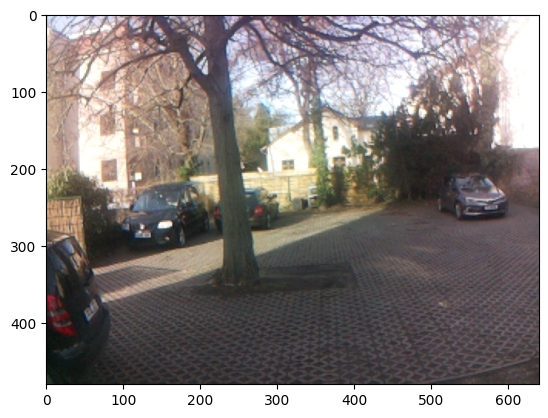

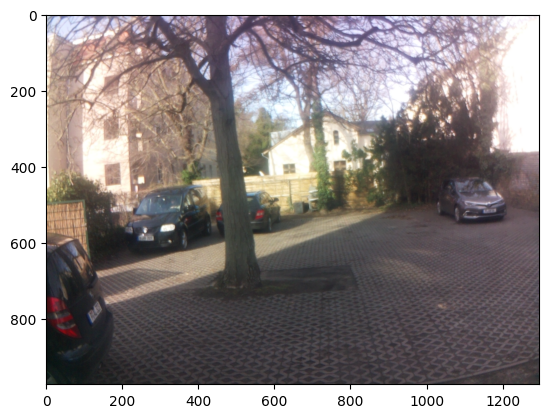

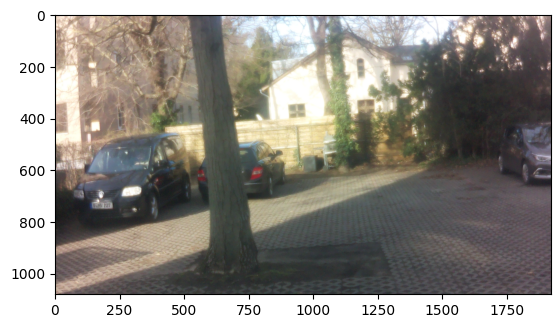

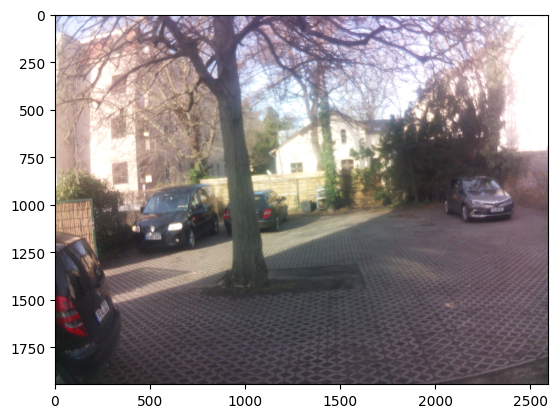

In [4]:
for a in arrays:
    plt.imshow(a[::-1,::-1,:])
    plt.show()